In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from feedback_prediction_dataset import FeedbackDataset
from train import train
from image_regressor_model import ImageRegressor

In [3]:
device = torch.device("cuda")

In [4]:
torch.cuda.empty_cache()
model = ImageRegressor(5).to(device)
torch.cuda.empty_cache()
print("Number of parameters:", model.getNumberOfParameters())

Number of parameters: 1244545


In [5]:
dataset = FeedbackDataset()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [6]:
def loss(prediction, label):
    return torch.sum(torch.pow(prediction-label, 2))

In [7]:
model = train(model, optimizer, loss, dataset, device, epochs=15, batchSize=16, countAccuracy=False)

Epoch 1/15
----------

Progress: 100%

Loss: 0.3862 Accuracy: 0.0000 Duration: 1m 56s

Epoch 2/15
----------

Progress: 100%

Loss: 0.3292 Accuracy: 0.0000 Duration: 1m 26s

Epoch 3/15
----------

Progress: 100%

Loss: 0.3234 Accuracy: 0.0000 Duration: 1m 14s

Epoch 4/15
----------

Progress: 100%

Loss: 0.3097 Accuracy: 0.0000 Duration: 1m 9s

Epoch 5/15
----------

Progress: 100%

Loss: 0.3051 Accuracy: 0.0000 Duration: 1m 8s

Epoch 6/15
----------

Progress: 100%

Loss: 0.2955 Accuracy: 0.0000 Duration: 1m 5s

Epoch 7/15
----------

Progress: 100%

Loss: 0.2871 Accuracy: 0.0000 Duration: 1m 1s

Epoch 8/15
----------

Progress: 100%

Loss: 0.2816 Accuracy: 0.0000 Duration: 1m 2s

Epoch 9/15
----------

Progress: 100%

Loss: 0.2755 Accuracy: 0.0000 Duration: 0m 59s

Epoch 10/15
----------

Progress: 100%

Loss: 0.2540 Accuracy: 0.0000 Duration: 0m 57s

Epoch 11/15
----------

Progress: 100%

Loss: 0.2423 Accuracy: 0.0000 Duration: 1m 2s

Epoch 12/15
----------

Progress: 100%

Loss: 0

In [8]:
torch.save(model, 'trained_models/feedback_predictor.pkl')

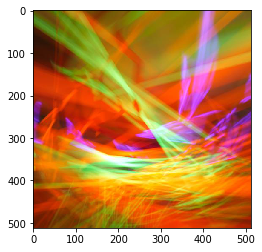

Predicted to have feedback of 4.09


In [35]:
randomSample = dataset[np.random.randint(len(dataset))]
pilImage = torchvision.transforms.ToPILImage()(randomSample[0])
plt.imshow(pilImage)
plt.show()

model.eval()
prediction = model(torch.unsqueeze(randomSample[0], dim=0).to(device)).item()
model.train()
print("Predicted to have feedback of {:.2f}".format(prediction))